# Credit Scoring Model Explainability
This notebook demonstrates how to interpret the credit scoring model using SHAP, IV plots, and WOE bin visualization.

In [3]:
# Imports
import pandas as pd
import shap
import joblib
import scorecardpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath("../src"))
from scorecard_utils import prob_to_score
shap.initjs()

In [4]:
# Load model and data
model = joblib.load('../models/logistic_model.pkl')
df = pd.read_csv('../data/cs-training.csv', index_col=0).fillna(-999)
bins = sc.woebin(df, y='SeriousDlqin2yrs')
woe_df = sc.woebin_ply(df, bins)
X = woe_df.drop(columns='SeriousDlqin2yrs')
y = woe_df['SeriousDlqin2yrs']

[INFO] creating woe binning ...


/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/germancredit.py:5: UserWarning: pkg_resources is deprecated as a

[INFO] converting into woe values ...


/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/germancredit.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/germancredit.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## 1. SHAP Global Explanation (Logistic Regression)

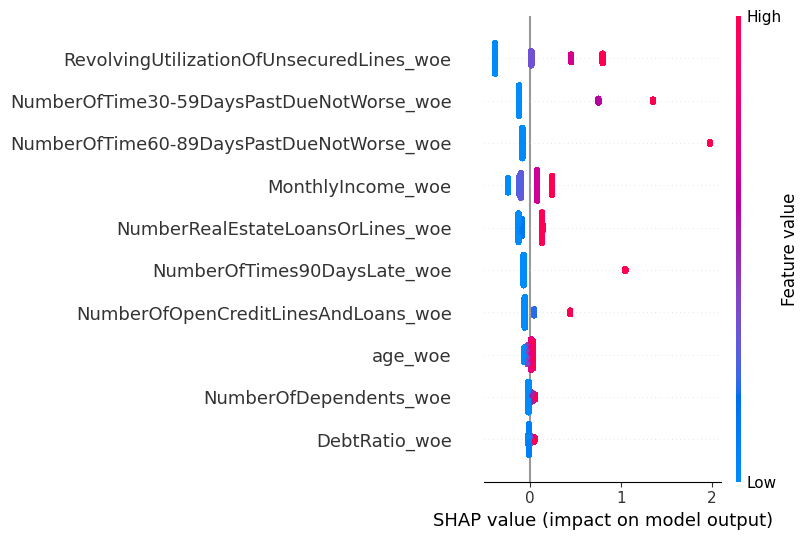

In [5]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

## 2. SHAP Local Explanation (Single Prediction)

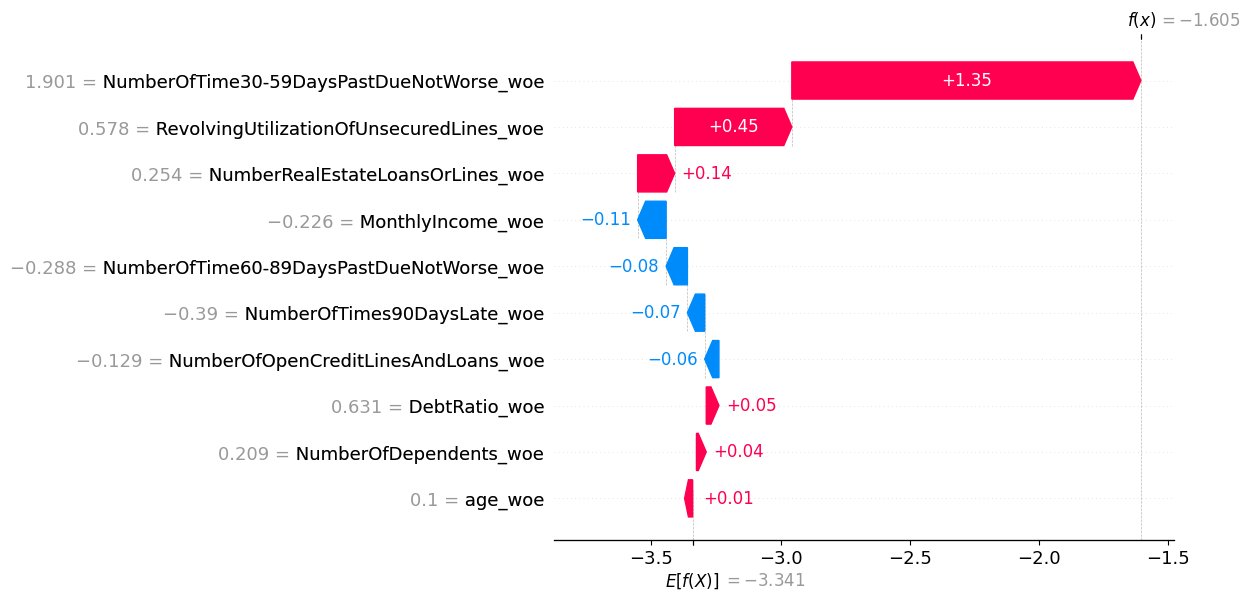

In [9]:
# Explain one observation
shap.plots.waterfall(shap_values[0])

## 3. IV Value Distribution

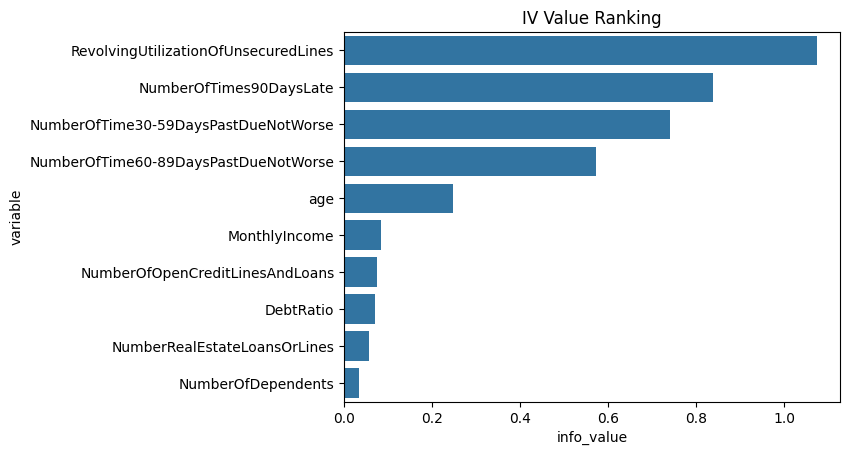

In [10]:
# Extract IV values
iv_list = []
for var in bins:
    iv_val = bins[var]['total_iv'].values[0]
    iv_list.append({'variable': var, 'info_value': iv_val})
iv_df = pd.DataFrame(iv_list).sort_values(by='info_value', ascending=False)
sns.barplot(data=iv_df, x='info_value', y='variable')
plt.title('IV Value Ranking')
plt.show()

## 4. WOE Plot Example

/Users/yahuanshi/.pyenv/versions/3.12.4/lib/python3.12/site-packages/scorecardpy/woebin.py:1304: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bins = bins.groupby('variable', group_keys=False).apply(gb_distr)


{'age': <Figure size 640x480 with 2 Axes>}

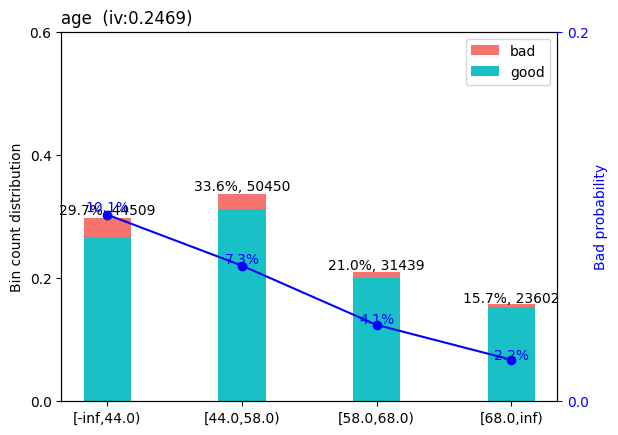

In [12]:
sc.woebin_plot(bins['age'])